# **An Investigation into the Iris Dataset**

In [106]:
# Imports

import pandas as pd

import seaborn as sns


## *Exploratory Data Analysis*

### Preliminary EDA  

I first conducted a preliminary exploratory data analysis to explore the underlying structure, health and baseline characteristics of the dataset before proceeding on to further analysis.  
This initial step included the following:  
  1. I imported the dataset via csv file, located in the repository, and read it through pandas  
  2. I examined the datasets structure and dimensions, along with feature names, target names, variable types and reviewed the datasets descriptive statistics, to gain an initial understanding of the dataset's distribution and data types.  
  3. Lastly, I checked for missing values, duplicate rows and examined the balance of the datasets target variables using a countplot, to confirm data quality. 

In [107]:
# Import the dataset via .csv file,
# & read through pandas
iris = pd.read_csv('iris.csv')

In [108]:
# Investigate shape of dataset
iris.shape

(150, 5)

In [109]:
# View sample of the dataset
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica
41,4.5,2.3,1.3,0.3,setosa
54,6.5,2.8,4.6,1.5,versicolor
62,6.0,2.2,4.0,1.0,versicolor
70,5.9,3.2,4.8,1.8,versicolor
48,5.3,3.7,1.5,0.2,setosa
91,6.1,3.0,4.6,1.4,versicolor
40,5.0,3.5,1.3,0.3,setosa
115,6.4,3.2,5.3,2.3,virginica
114,5.8,2.8,5.1,2.4,virginica


In [110]:
# View feature names
iris.columns[:-1]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [111]:
# View target names
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [112]:
# View data types
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [113]:
# Descriptive statistics summary of dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [114]:
# Check for missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [115]:
# Check for duplicates
iris.duplicated().sum()

3

In [116]:
# View duplicated rows
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


<Axes: xlabel='species', ylabel='count'>

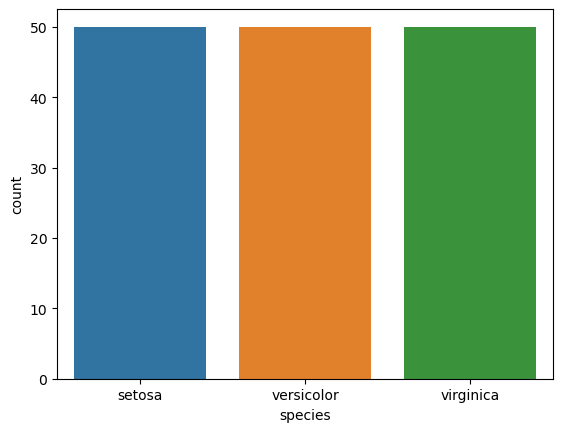

In [121]:
# Check for balance in the target variable
sns.countplot(x ='species', hue = "species", data = iris)

### Univariate Analysis

### Bivariate Analysis

### Correlation Analysis

### Multidimensional Data Exploration

### Baseline Modeling

### Conclusion of Findings